In [4]:
# Download and Clean the Data
import numpy as np
import pandas as pd
import zipfile
import urllib.request
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip'
# filename = 'dataset_diabetes.zip'
# urllib.request.urlretrieve(url, filename)

# with zipfile.ZipFile(filename, 'r') as zip_ref:
    # zip_ref.extractall('data')

diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')

# drop columns with more than 30% missing values
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()




label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

# create binary values for readmitted column
diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)


oe = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']], dtype=int)
diabetic_data['age'] = oe.fit_transform(diabetic_data[['age']])


seed = 123
np.random.seed(seed) 


In [5]:
# Create 20% testing and 80% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [5]:
# Neural Network Classifier

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8885307758823991


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:598: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


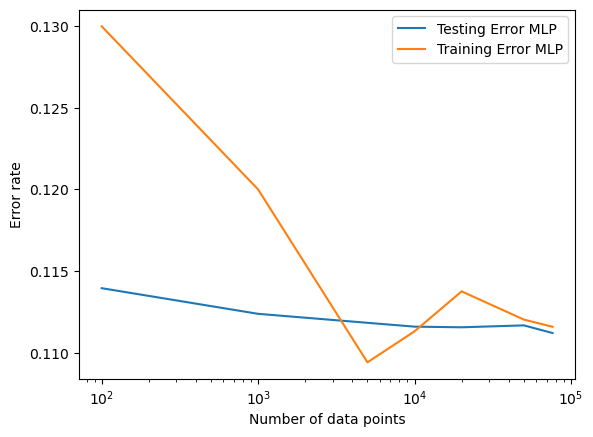

In [15]:
# perform nueral network with different training sizes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 76324]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


training_errors_mlp = []
testing_errors_mlp = []
for m_tr in train_sizes:
 mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd', batch_size=256)
 mlp.fit(X_train[:m_tr], y_train[:m_tr])
 training_errors_mlp.append(1 - mlp.score(X_train[:m_tr], y_train[:m_tr]))
 testing_errors_mlp.append(1 - mlp.score(X_test, y_test))

plt.semilogx(train_sizes, testing_errors_mlp, label="Testing Error MLP")
plt.semilogx(train_sizes, training_errors_mlp, label="Training Error MLP")
plt.legend(loc='upper right')
plt.xlabel('Number of data points')
plt.ylabel('Error rate')
plt.show()



C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:598: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:598: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network

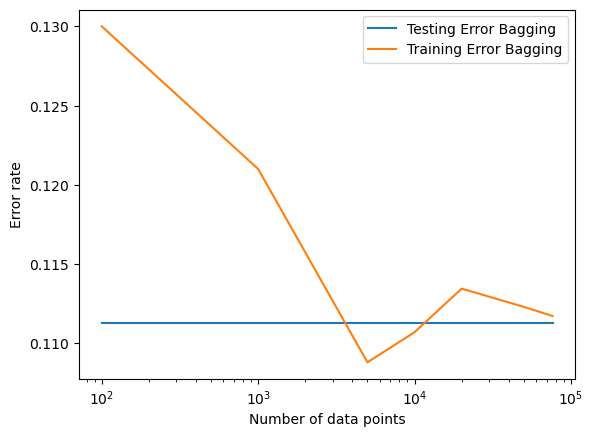

In [22]:
# NN with bagging and boosting

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 76324]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

training_errors_bagging  = []
testing_errors_bagging  = []
for m_tr in train_sizes:
    bagging = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd', batch_size=256),
                                 n_estimators=50,
                                 max_samples=0.5,
                                 max_features=0.5,
                                 random_state=seed)
    bagging.fit(X_train[:m_tr], y_train[:m_tr])
    training_errors_bagging.append(1 - bagging.score(X_train[:m_tr], y_train[:m_tr]))
    testing_errors_bagging.append(1 - bagging.score(X_test, y_test))

plt.semilogx(train_sizes, testing_errors_bagging, label="Testing Error Bagging")
plt.semilogx(train_sizes, training_errors_bagging, label="Training Error Bagging")
plt.legend(loc='upper right')
plt.xlabel('Number of data points')
plt.ylabel('Error rate')
plt.show()

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


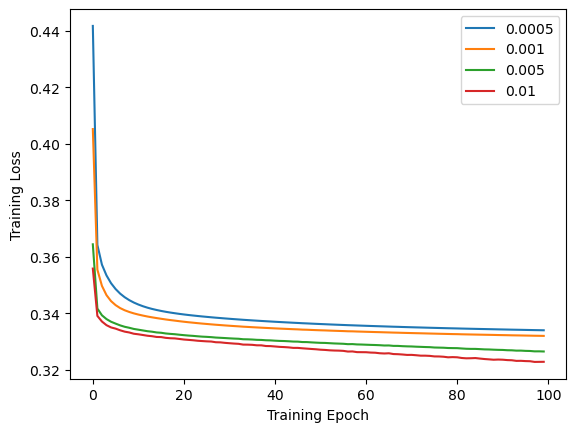

In [16]:
# Optimization Curves
learning_rates = [0.0005, 0.001, 0.005, 0.01]

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd',
                        batch_size=256, n_iter_no_change=100, max_iter=100, learning_rate_init=lr)
    mlp.fit(X_train, y_train)   
    plt.plot(mlp.loss_curve_, label=str(lr))  
plt.xlabel('Training Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='upper right')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, random_state=seed)

# perform 5-fold cross-validation
scores = cross_val_score(model, X, y_train, cv=5)

print(f'Scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores: [0.88883066 0.88856862 0.88850311 0.88824107 0.88829927]
Mean accuracy: 0.888488546338241


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


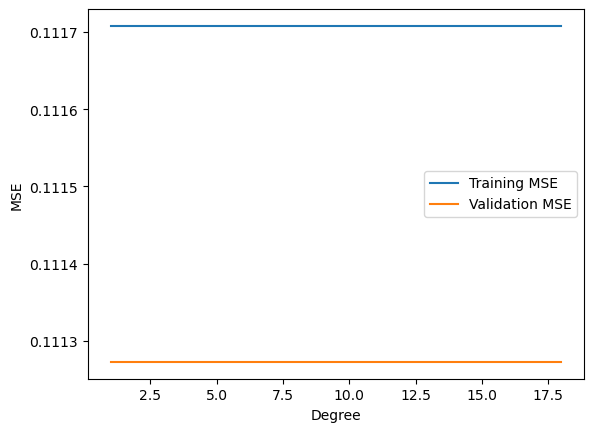

In [20]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, zero_one_loss

degrees = [1, 3, 5, 7, 10, 15, 18]
train_mse = []
val_mse = []

# Loop over the degrees
for degree in degrees:
    mlp = MLPClassifier(hidden_layer_sizes=(degree,),  random_state=seed, solver='sgd', batch_size=256)
    mlp.fit(X_train, y_train)
    train_pred = mlp.predict(X_train)
    train_mse.append(1- accuracy_score(y_train, train_pred))
    val_pred = mlp.predict(X_test)
    val_mse.append(1- accuracy_score(y_test, val_pred))
    


# Plot the results
plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, val_mse, label='Validation MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8888059114849461
